#  NLP Classification Project: CleanWatAI


##  Project Overview

The CleanWatAI project aims to classify water-related news excerpts using Natural Language Processing (NLP) techniques. 
By leveraging both structured and unstructured data, our objective is to detect early signs of water contamination, supply risk, and infrastructure vulnerability in different regions.

This notebook follows a structured data science workflow inspired by the CRISP-DM methodology, enriched with textual insights from NLP feature engineering and model optimization. 

**Project Goals:**
- Clean and explore the dataset (both structured and textual).
- Engineer meaningful features, especially from text.
- Apply various NLP models to classify excerpts based on contamination risk.
- Evaluate and interpret model performance with emphasis on explainability.


## Data Loading and Initial Exploration



In this section, we will:
- Load the dataset
- Display basic structure and size
- Check column types and missing values


In [570]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\data\raw\cleaned_water_sanitation.csv')
df.head()

country                                       source_title  \
0    DR Congo  Community Report Highlights Water Safety Impro...   
1  Bangladesh    Local Media Confirms Upgraded Sanitation Access   
2       Haiti    Hazardous Waste Linked to Water Pollution Spike   
3       India      Contamination Alert Raised in Remote District   
4       India  Community Report Highlights Water Safety Impro...   

                                             excerpt  geo_location  \
0  Recent assessments indicate that the water sou...    -46.696515   
1  Community-led monitoring programs have kept th...     36.258375   
2  Children are especially vulnerable, with repor...     65.111923   
3  The lack of proper sanitation has led to the m...    -33.464520   
4  Recent assessments indicate that the water sou...     35.906936   

       water_source    sanitation_type                 sector  gender  \
0  Protected Spring  Composting Toilet  Public Infrastructure    Male   
1  Protected Spring    Open Defecation              Education  Female   
2             River       Flush Toilet              Education  Female   
3    Truck Delivery    Open Defecation            Agriculture  Female   
4              Well  Composting Toilet              Education  Female   

  age_group income_level  ... water_color water_clarity water_odor  \
0     Adult         High  ...       clear         clear       none   
1     Youth         High  ...       clear         clear       none   
2   Elderly       Middle  ...       green         clear       none   
3     Child       Middle  ...       murky        turbid       none   
4   Elderly         High  ...       clear         clear       none   

   recent_rain nearby_activities nearby_infrastructure vegetation_near_source  \
0           no              none                  none                   lush   
1           no              none                  none                   lush   
2           no  sewage treatment      waste facilities                   dead   
3           no            mining      waste facilities                 sparse   
4           no              none                  none                   lush   

  waste_disposal_nearby animal_access water_flow_rate  
0                  none            no         flowing  
1                  none            no         flowing  
2         managed sites            no        stagnant  
3          open dumping           yes        stagnant  
4                  none            no         flowing  

[5 rows x 28 columns]

In [571]:
df[["severity"] + df.columns[:10].tolist()]


severity     country                                       source_title  \
0        Safe    DR Congo  Community Report Highlights Water Safety Impro...   
1        Safe  Bangladesh    Local Media Confirms Upgraded Sanitation Access   
2      Unsafe       Haiti    Hazardous Waste Linked to Water Pollution Spike   
3      Unsafe       India      Contamination Alert Raised in Remote District   
4        Safe       India  Community Report Highlights Water Safety Impro...   
...       ...         ...                                                ...   
2634   Unsafe    DR Congo        NGO Report Exposes Waterborne Disease Surge   
2635     Safe      Uganda    Ministry Bulletin: Safe Water Measures in Place   
2636     Safe       India    Local Media Confirms Upgraded Sanitation Access   
2637     Safe       Kenya    UNICEF Acknowledges Safe Drinking Water Program   
2638     Safe       Kenya    Field Study Validates Clean Water in Rural Area   

                                                excerpt  geo_location  \
0     Recent assessments indicate that the water sou...    -46.696515   
1     Community-led monitoring programs have kept th...     36.258375   
2     Children are especially vulnerable, with repor...     65.111923   
3     The lack of proper sanitation has led to the m...    -33.464520   
4     Recent assessments indicate that the water sou...     35.906936   
...                                                 ...           ...   
2634  Children are especially vulnerable, with repor...    -12.418458   
2635  Local health workers confirm that proper sanit...    -83.546928   
2636  The newly installed filtration systems have ef...     39.596004   
2637  Data collected over several months confirm hig...     -7.245674   
2638  Data collected over several months confirm hig...     39.296931   

          water_source    sanitation_type                 sector  gender  \
0     Protected Spring  Composting Toilet  Public Infrastructure    Male   
1     Protected Spring    Open Defecation              Education  Female   
2                River       Flush Toilet              Education  Female   
3       Truck Delivery    Open Defecation            Agriculture  Female   
4                 Well  Composting Toilet              Education  Female   
...                ...                ...                    ...     ...   
2634         Rainwater        Pit Latrine                 Health  Female   
2635         Rainwater       Flush Toilet              Education  Female   
2636       Piped Water    Open Defecation                 Health  Female   
2637  Protected Spring        Pit Latrine              Education  Female   
2638    Truck Delivery    Open Defecation  Public Infrastructure  Female   

     age_group income_level  
0        Adult         High  
1        Youth         High  
2      Elderly       Middle  
3        Child       Middle  
4      Elderly         High  
...        ...          ...  
2634     Child       Middle  
2635   Elderly         High  
2636     Child       Middle  
2637     Youth       Middle  
2638     Child          Low  

[2639 rows x 11 columns]

##  Exploratory Data Analysis (EDA)

In this section, we will explore the structure and quality of the dataset.  
We aim to:
- Understand the types of features (structured vs. unstructured)
- Identify any missing or duplicate values
- Examine the distribution of the target variable
- Begin understanding patterns in the text

> EDA helps us spot problems early and form hypotheses for modeling.


In [572]:
print(df.columns)

Index(['country', 'source_title', 'excerpt', 'geo_location', 'water_source',
       'sanitation_type', 'sector', 'gender', 'age_group', 'income_level',
       'infrastructure_type', 'population_density', 'climate_zone', 'year',
       'organization', 'source_type', 'special_needs_group', 'severity',
       'water_color', 'water_clarity', 'water_odor', 'recent_rain',
       'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')


In [573]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2639 non-null   object 
 1   source_title            2639 non-null   object 
 2   excerpt                 2639 non-null   object 
 3   geo_location            2639 non-null   float64
 4   water_source            2639 non-null   object 
 5   sanitation_type         2639 non-null   object 
 6   sector                  2639 non-null   object 
 7   gender                  2639 non-null   object 
 8   age_group               2639 non-null   object 
 9   income_level            2639 non-null   object 
 10  infrastructure_type     2639 non-null   object 
 11  population_density      2639 non-null   object 
 12  climate_zone            2639 non-null   object 
 13  year                    2639 non-null   int64  
 14  organization            2639 non-null   

In [574]:
# Missing value analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

special_needs_group    468
dtype: int64

In [575]:
# Checking for duplicates
df.duplicated().sum()

171

In [576]:
df['excerpt'][10:20]

10    The lack of proper sanitation has led to the m...
11    Community-led monitoring programs have kept th...
12    The lack of proper sanitation has led to the m...
13    Data collected over several months confirm hig...
14    Data collected over several months confirm hig...
15    The newly installed filtration systems have ef...
16    Residents have reported widespread illness, wi...
17    Community-led monitoring programs have kept th...
18    Data collected over several months confirm hig...
19    Community-led monitoring programs have kept th...
Name: excerpt, dtype: object

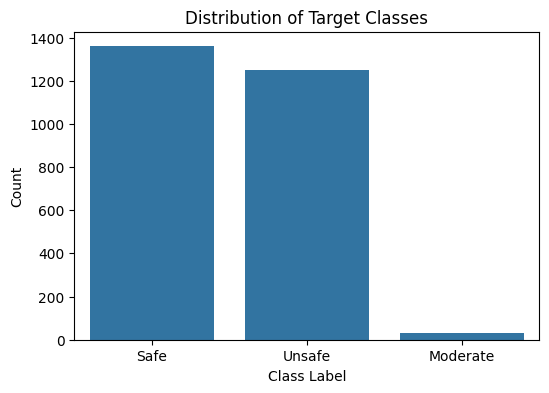

In [577]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='severity', data=df)
plt.title("Distribution of Target Classes")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


<Figure size 600x400 with 0 Axes>

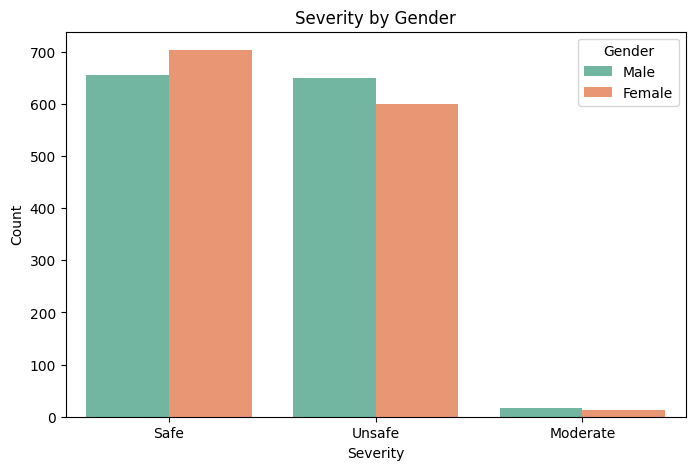

In [578]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
plt.figure(figsize=(8, 5))
sns.countplot(x='severity', hue='gender', data=df, palette='Set2')
plt.title("Severity by Gender")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

##  Data Cleaning

In this section, we will perform essential cleaning tasks to ensure data quality and consistency.  
This includes:
- Dropping duplicates
- Handling missing values
- Normalizing inconsistent entries
- Filtering irrelevant rows if applicable


In [579]:
# Viewing missing values and null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 468


In [580]:
# Replacing actual NaN values
df['special_needs_group'] = df['special_needs_group'].fillna('none')

# Also replacing string "None" values if they exist
df['special_needs_group'] = df['special_needs_group'].replace('None', 'none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    596
Pregnant Women      529
Elderly             524
Disabled            522
none                468
Name: count, dtype: int64

In [581]:
# Dropping duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Dropped {initial_shape[0] - df.shape[0]} duplicate rows.")
print(f'Duplicated entries : {df.duplicated().sum()}')

Dropped 171 duplicate rows.
Duplicated entries : 0


**Enriching Location Data**

To support rich geographical analysis and live visualizations, we will enhance our `geo_location` and `country` columns.

We aim to:
- Convert `geo_location` (text) into **latitude & longitude**
- Break down `country` into **county, constituency, area, and location** 
- Enable mapping tools like **Plotly**, **Folium**, or **Tableau** to interact with enriched data

In [582]:
from geopy.geocoders import Nominatim
import time
import pycountry

# Initialize geolocator
geolocator = Nominatim(user_agent="cleanwatAI_geolocator")

# Standardize country names using pycountry
def standardize_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return name

# Get lat/lon using geopy
def get_lat_lon(country_name):
    try:
        location = geolocator.geocode(country_name)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

df['country_standardized'] = df['country'].apply(standardize_country)
country_coords = df['country_standardized'].dropna().unique()
coord_map = {}

for country in country_coords:
    lat_lon = get_lat_lon(country)
    coord_map[country] = lat_lon
    time.sleep(1)

# Map coordinates back to DataFrame
df[['latitude', 'longitude']] = df['country_standardized'].map(coord_map).apply(pd.Series)


In [583]:
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [584]:
from shapely.geometry import Point

# Drop rows with missing coordinates
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create geometry column
df_clean['geometry'] = df_clean.apply(lambda r: Point(float(r['longitude']), float(r['latitude'])), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, geometry='geometry', crs="EPSG:4326")

In [585]:
gdf = gpd.sjoin(gdf, world[['geometry', 'NAME', 'CONTINENT']], how='left', predicate='within')
df['country'] = gdf['NAME']
df['continent'] = gdf['CONTINENT']

In [586]:
admin1_path = r"C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\Admin"
admin1 = gpd.read_file(admin1_path)

if 'index_right' in gdf.columns:
    gdf = gdf.drop(columns=['index_right'])

if 'index_right' in admin1.columns:
    admin1 = admin1.drop(columns=['index_right'])

gdf = gpd.sjoin(gdf, admin1[['name', 'iso_a2', 'geometry']], how='left', predicate='within')

# 2. Rename columns FIRST
gdf = gdf.rename(columns={'name': 'admin_region', 'iso_a2': 'country_code'})

# 3. Assign to your original DataFrame
df['admin_region'] = gdf['admin_region']
df['country_code'] = gdf['country_code']

In [587]:
# Define colors for each severity level
severity_colors = {
    'Unsafe': 'red',
    'Moderate': 'orange',
    'safe': 'green'
}


In [588]:
import folium
from folium.plugins import MarkerCluster

# marker color based on severity
def get_marker_color(severity):
    if severity == 'Safe':
        return 'green'
    elif severity == 'Moderate':
        return 'orange'
    elif severity == 'Unsafe':
        return 'red'
    else:
        return 'gray'

# Base map centered on mean coordinates
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3, tiles='cartodbpositron')

# Add marker cluster to group nearby points
marker_cluster = MarkerCluster().add_to(m)

# Add markers with popups and color-coded severity
for _, row in df.dropna(subset=['latitude', 'longitude', 'severity']).iterrows():
    color = get_marker_color(row['severity'])

    # Prepare popup HTML
    popup_html = f"""
    <b>Country:</b> {row['country']}<br>
    <b>Region:</b> {row['admin_region']}<br>
    <b>Water Source:</b> {row['water_source']}<br>
    <b>Severity:</b> {row['severity']}<br>
    <b>Title:</b> {row['source_title']}
    """

    # Add CircleMarker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(marker_cluster)

# visualizethe map
m


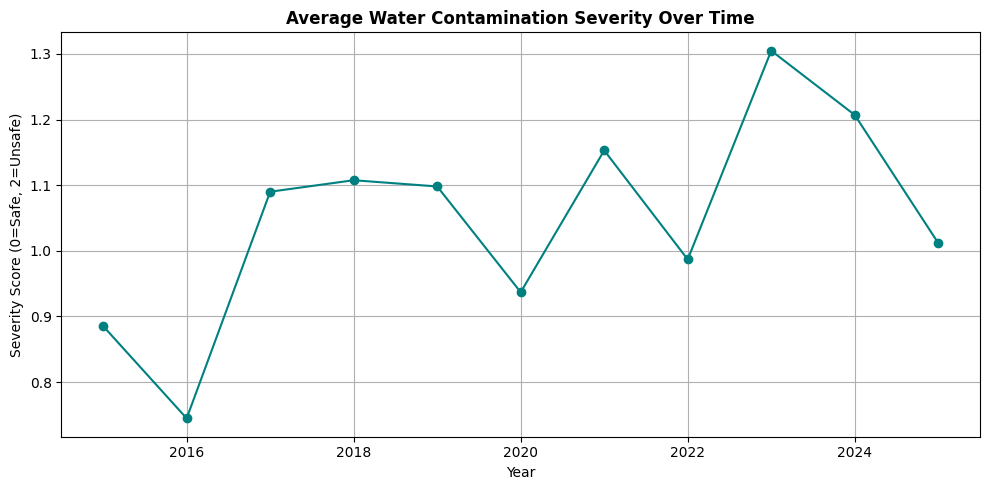

In [589]:
severity_map = {
    'Safe': 0,
    'Moderate': 1,
    'Unsafe': 2
}

# Create a numeric severity column
df['severity_score'] = df['severity'].map(severity_map)

# Now you can group and plot the mean severity
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('year')['severity_score'].mean().plot(ax=ax, color='teal', marker='o')

ax.set_title('Average Water Contamination Severity Over Time', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Severity Score (0=Safe, 2=Unsafe)')
plt.grid(True)
plt.tight_layout()
plt.show()

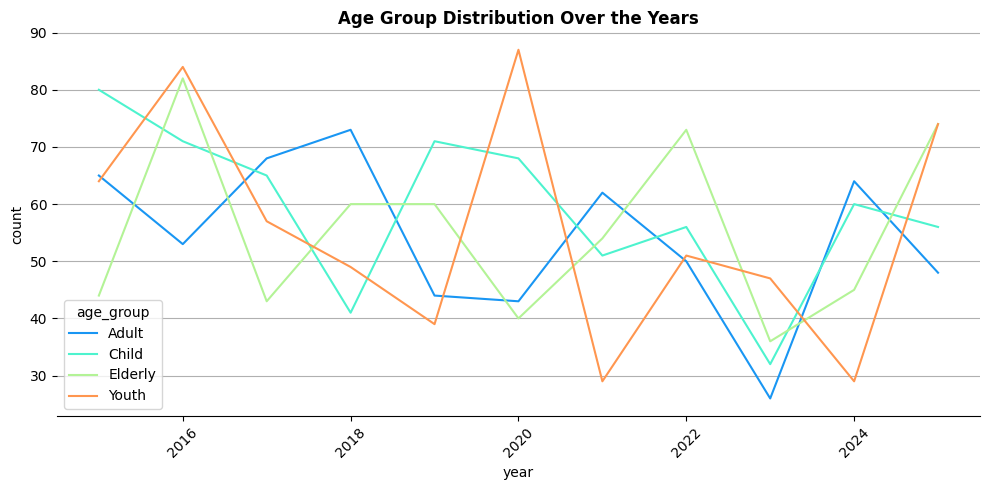

In [590]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df.groupby(['year', 'age_group']).size().reset_index(name='count'),
             x='year', y='count', hue='age_group', palette='rainbow', ax=ax)

ax.set_title('Age Group Distribution Over the Years', weight='bold')
ax.grid(axis='y')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

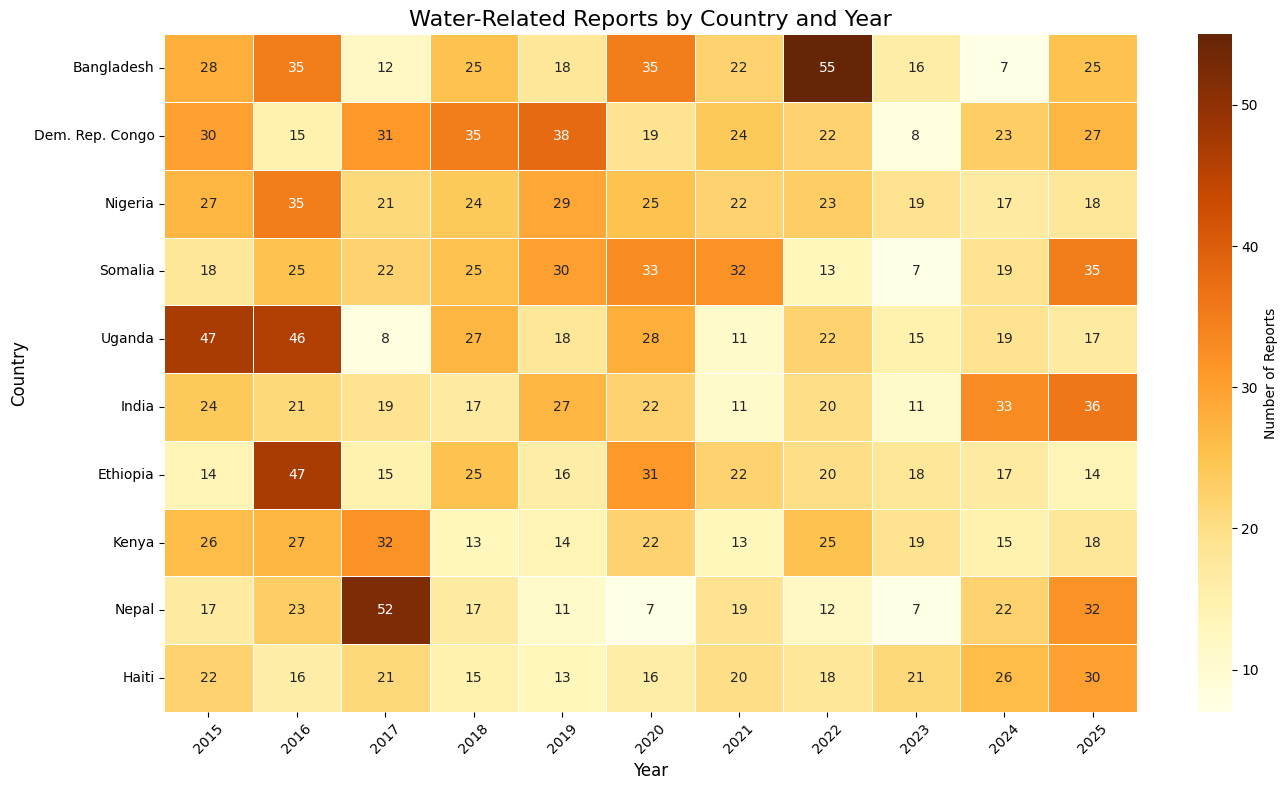

In [591]:
# Drop missing or invalid data
df_clean = df.dropna(subset=['country', 'year'])
df_clean['year'] = df_clean['year'].astype(str)

# Count reports per (country, year)
heatmap_data = df_clean.groupby(['country', 'year']).size().unstack(fill_value=0)

top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_top = heatmap_data.loc[top_countries]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_top, cmap="YlOrBr", annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Reports'})
    
plt.title("Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [592]:
severity_map = {
    'Safe': 1,
    'Moderate': 2,
    'Unsafe': 3
}
df_clean['severity_score'] = df_clean['severity'].map(severity_map)
severity_heatmap = df_clean.groupby(['country', 'year'])['severity_score'].mean().unstack()
top_countries = df_clean['country'].value_counts().head(15).index
severity_heatmap_top = severity_heatmap.loc[top_countries]


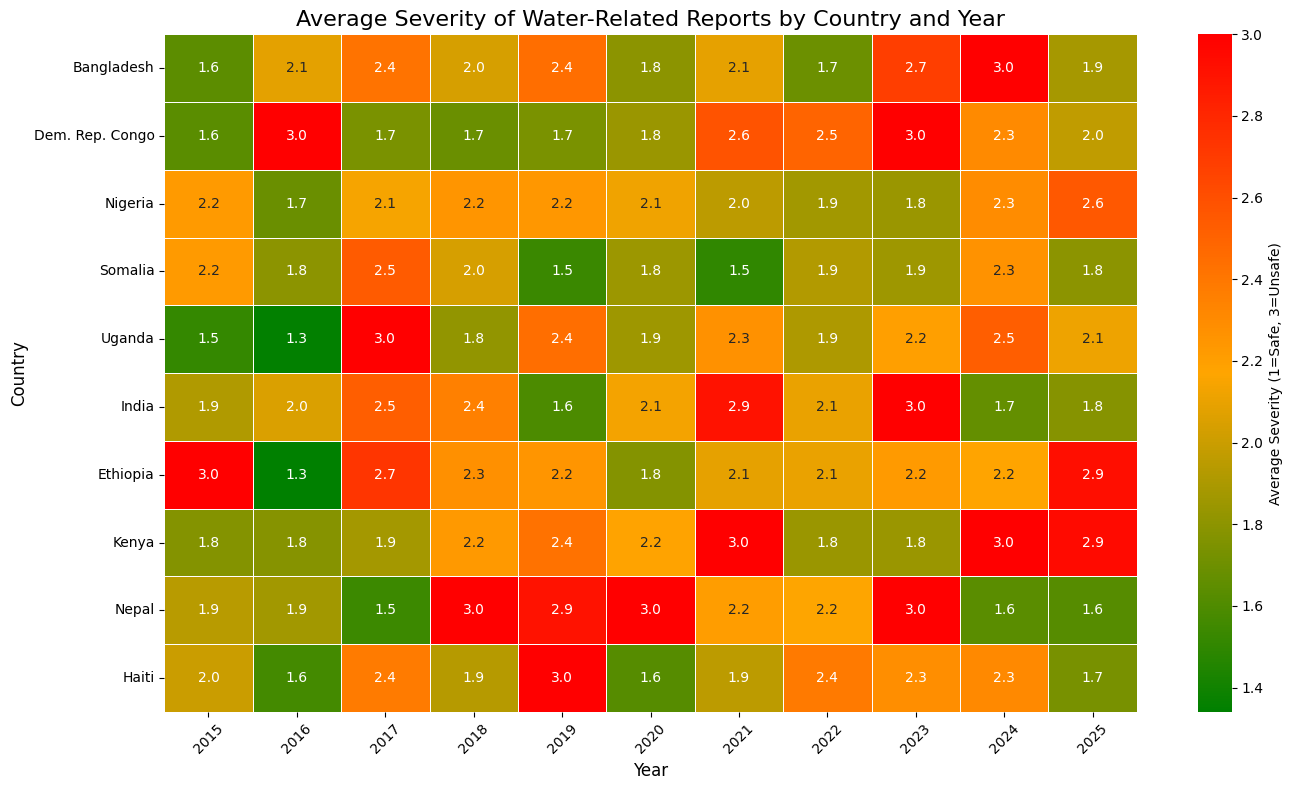

In [593]:
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: green (safe) → orange (moderate) → red (unsafe)
cmap = LinearSegmentedColormap.from_list("severity", ['green', 'orange', 'red'])

plt.figure(figsize=(14, 8))
sns.heatmap(
    severity_heatmap_top,
    cmap=cmap,
    annot=True,
    fmt='.1f',
    linewidths=.5,
    cbar_kws={'label': 'Average Severity (1=Safe, 3=Unsafe)'}
)

plt.title("Average Severity of Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Heatmap Visualizations Summary**

#### Water-Related Reports by Country and Year
This heatmap shows the **number of water-related reports** recorded across countries from **2015 to 2025**.

- **Darker shades** indicate **more reports**.
- Countries like **Nepal**, **Nigeria**, and **Ethiopia** show high reporting activity.
- Highlights trends in reporting, possibly due to increased awareness or worsening conditions in certain years.

#### Average Severity of Reports by Country and Year
This heatmap presents the **average severity score** (on a scale of **1 = Safe** to **3 = Unsafe**) for water-related reports.

- **Green** indicates **lower average severity** (safer), while **red** indicates **higher severity** (more unsafe).
- Most averages are between **2.6 and 3**, suggesting generally **moderate to high severity** levels.
- A few **green cells** (e.g., Uganda 2016, Ethiopia 2016) reflect **less severe years**, but these are rare.

These visualizations provide insight into both the **volume** and **intensity** of water-related issues over time and geography.


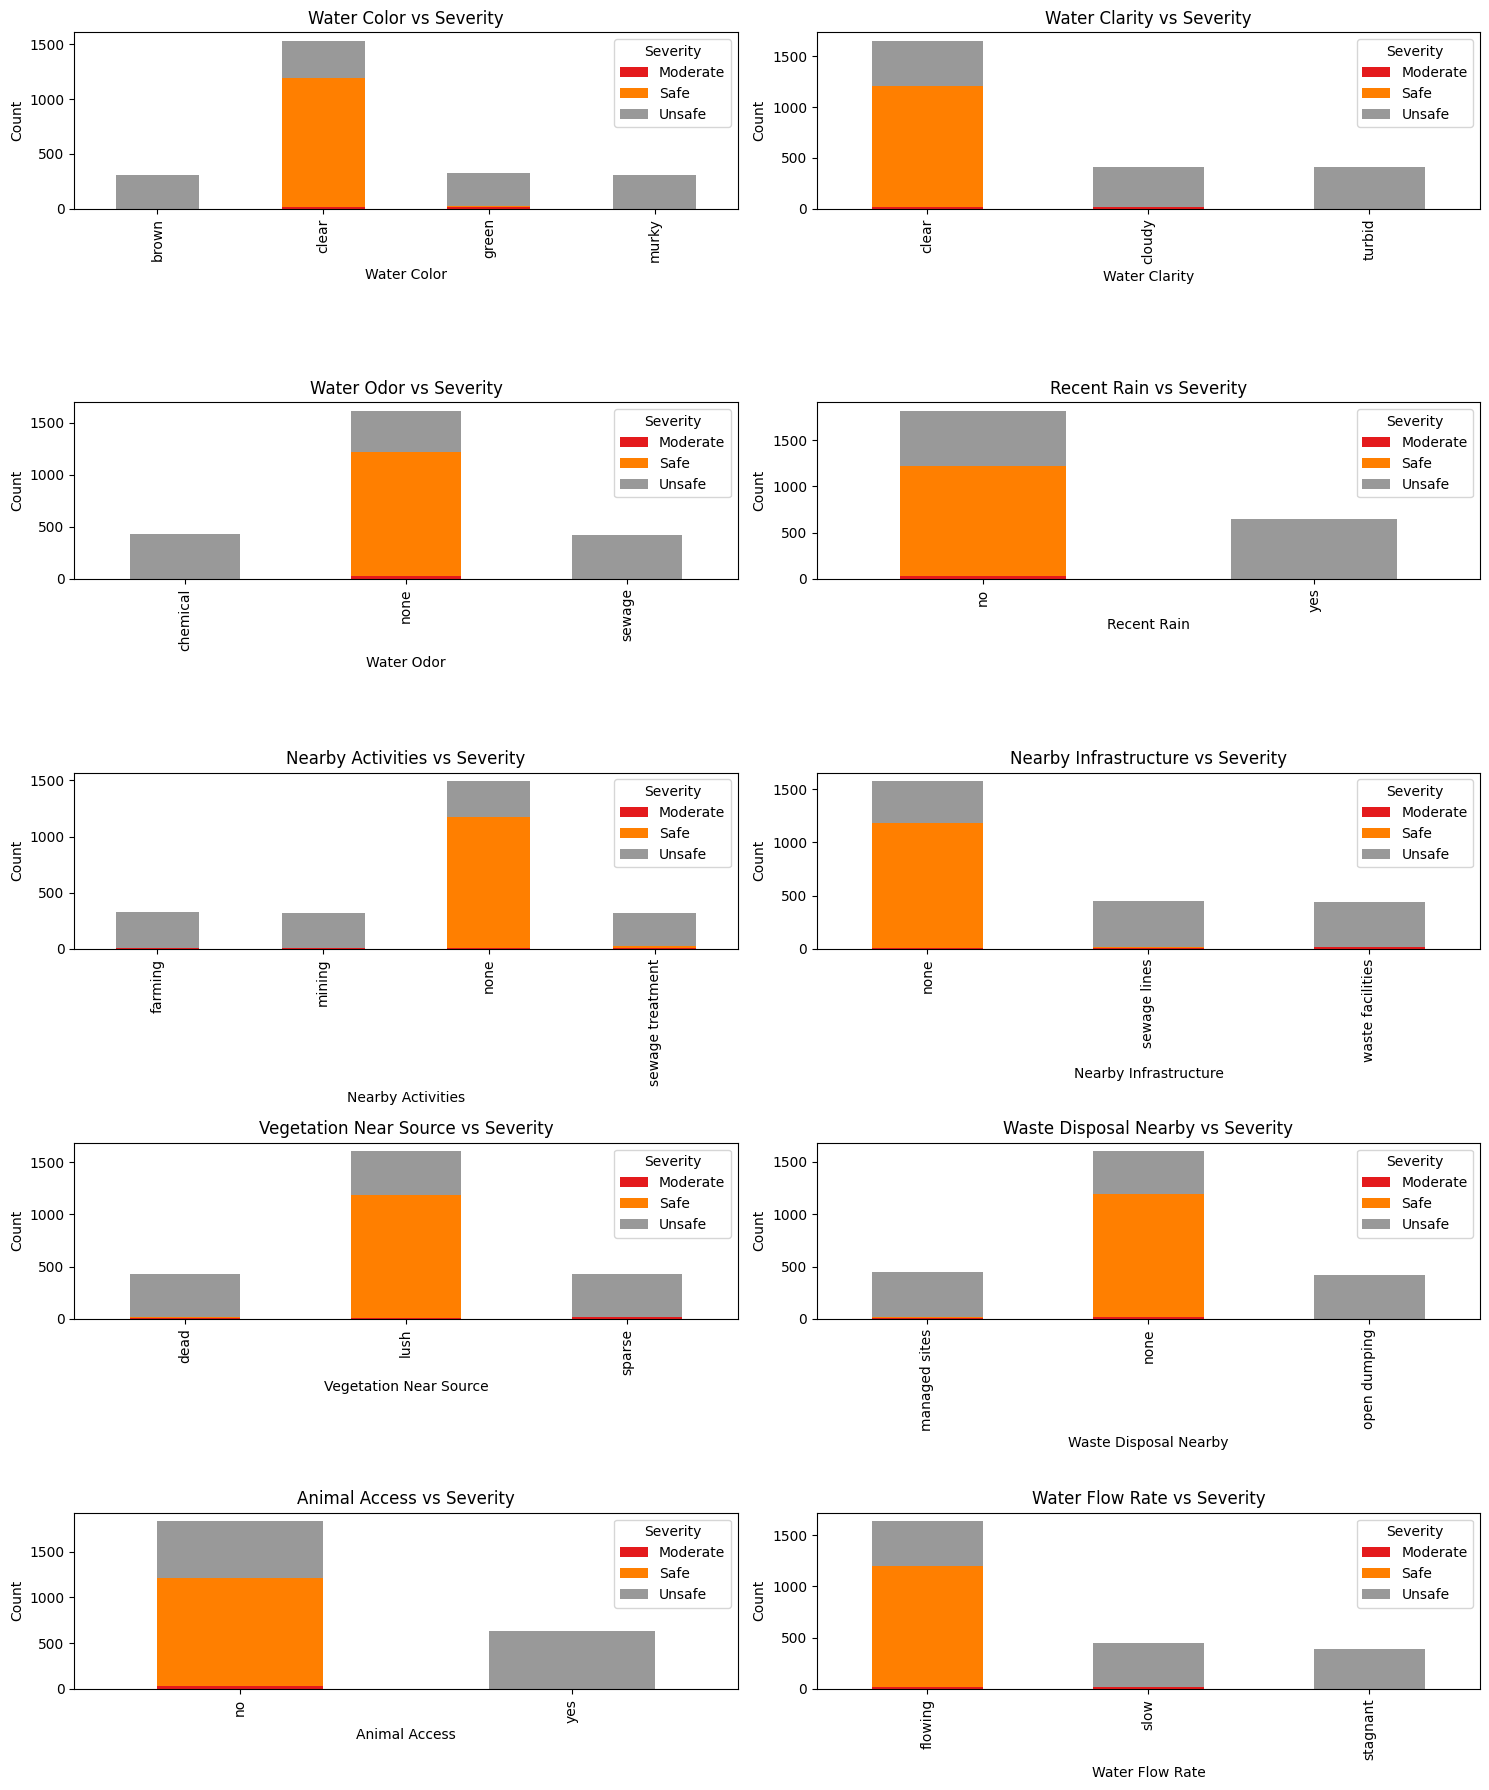

In [594]:
# Select categorical water quality features
features_to_plot = [
    'water_color', 'water_clarity', 'water_odor', 'recent_rain',
    'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_flow_rate'
]

# Set up subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Plot count plots for each feature colored by severity
for i, feature in enumerate(features_to_plot):
    # Group by feature and severity, count occurrences
    df_grouped = df.groupby([feature, 'severity']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set1')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Severity')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Severity')

# Adjust layout
plt.tight_layout()


In [595]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df

source_type        Academic Paper  Field Survey  Gov Report  NGO Report
organization                                                           
Red Cross                     119            89         115         139
Save the Children             138           123          99         145
UNICEF                        118            98          91         129
WHO                            90           121         149         129
Water.org                     182           134         116         144

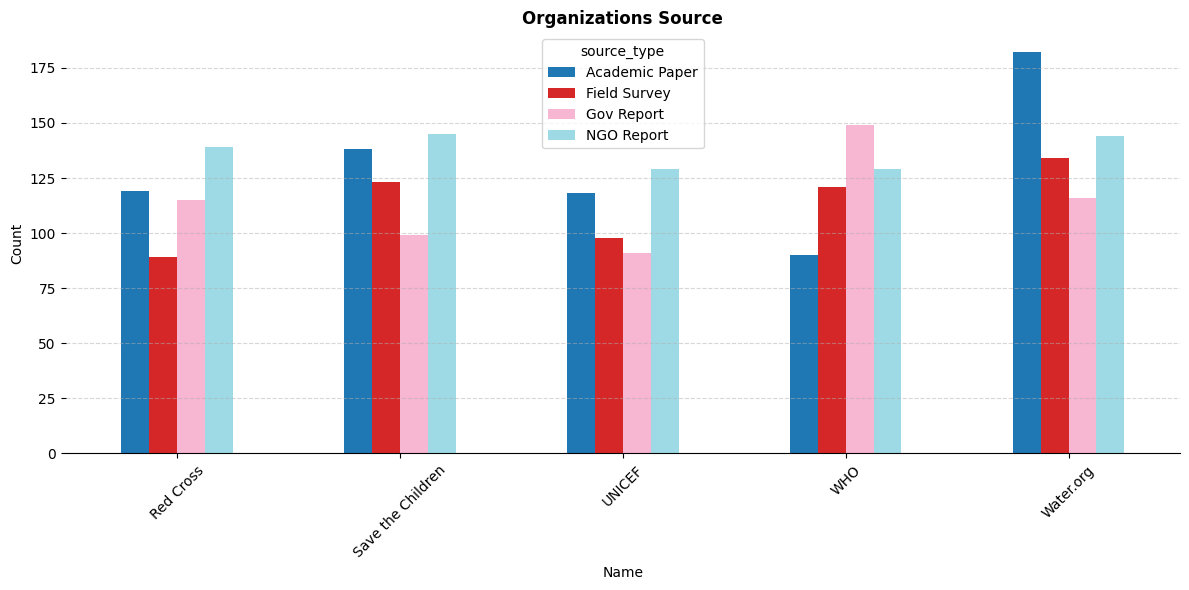

In [596]:
fig, ax = plt.subplots(figsize=(12, 6))
source_df.plot.bar(stacked=False, ax=ax, colormap='tab20')

ax.set_title('Organizations Source', weight='bold')
ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Hide spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

##  Text Preprocessing (Excerpt Column)

To prepare our text data for modeling, we must standardize and clean the raw text in the `excerpt` column.  

We will:
- Convert all text to lowercase
- Remove punctuation, digits, and extra whitespace
- Remove stopwords (like "the", "is", "and")
- Tokenize the text (split into words)
- Apply lemmatization to reduce words to base form



In [621]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [598]:
#cleaning + lemmatization function
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Handle negations (combine with next word if possible)
    text = re.sub(r"\b(no|not|never)\s+(\w+)", r"no_\2", text)

    # Remove punctuation except underscores (used in negation)
    text = re.sub(r"[^\w\s_]", "", text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Lemmatize and remove stopwords (except 'no_x' preserved words)
    cleaned = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if (token in stop_words and token.startswith('no_')) or (token not in stop_words and len(token) > 2)
    ]

    return " ".join(cleaned)

In [599]:
# Apply to the excerpt column
df['clean_excerpt'] = df['excerpt'].astype(str).apply(clean_text)
df[['excerpt', 'clean_excerpt']].head()


excerpt  \
0  Recent assessments indicate that the water sou...   
1  Community-led monitoring programs have kept th...   
2  Children are especially vulnerable, with repor...   
3  The lack of proper sanitation has led to the m...   
4  Recent assessments indicate that the water sou...   

                                       clean_excerpt  
0  recent assessment indicate water source meet h...  
1  communityled monitoring program kept water sou...  
2  child especially vulnerable report unsafe latr...  
3  lack proper sanitation led mixing human waste ...  
4  recent assessment indicate water source meet h...

- Texts were lowercased, cleaned, tokenized, and lemmatized.
- The processed text is stored in `clean_excerpt`.
- This column will now be used for vectorization (TF-IDF, Bag-of-Words, etc.).

**Word Frequency Distribution**

Before vectorizing the text, it's useful to understand which words appear most frequently.

We will:
- Tokenize all cleaned excerpts.
- Count each word's occurrence.
- Visualize the top 20 most frequent words.


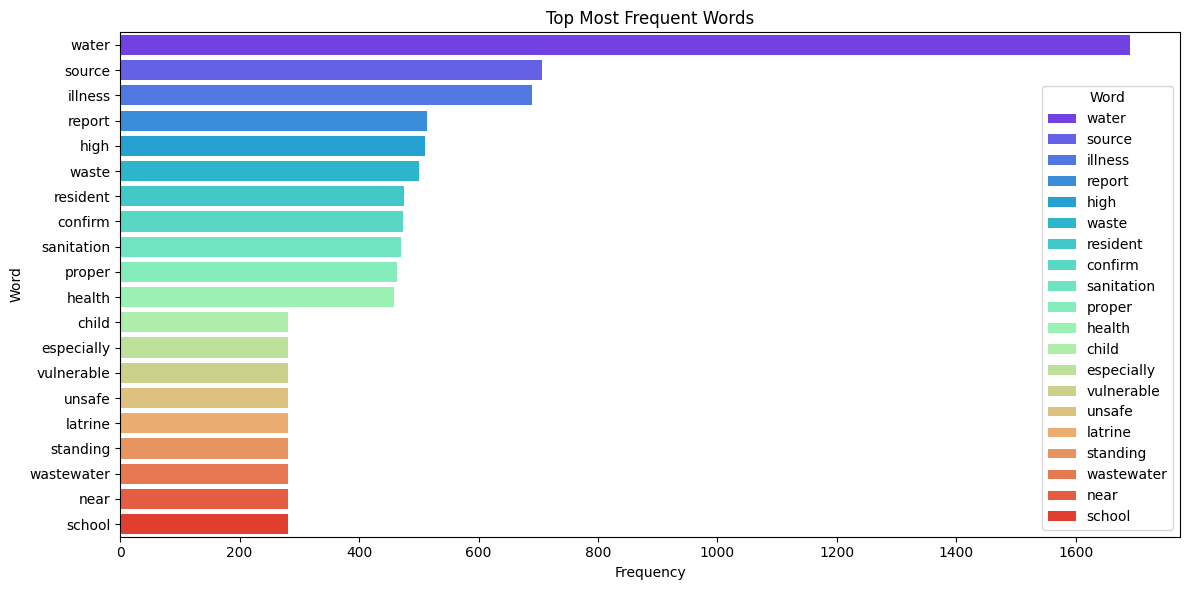

In [600]:
from collections import Counter

# Combine all cleaned text into a single list of words
all_words = ' '.join(df['clean_excerpt']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Create DataFrame for plotting
freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette='rainbow', hue='Word', legend=True)
plt.title('Top Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

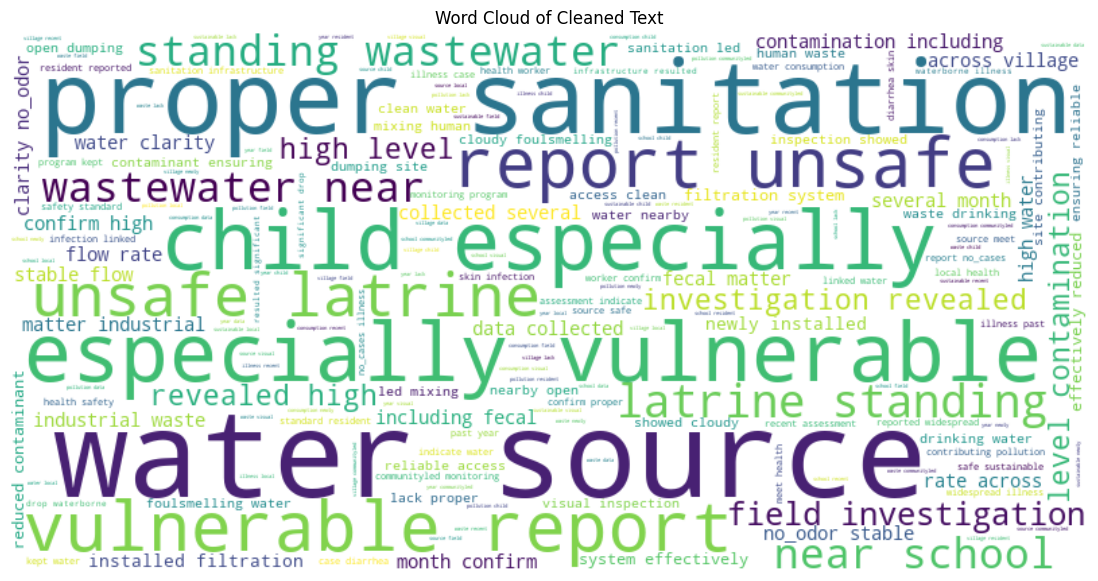

In [601]:
from wordcloud import WordCloud

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

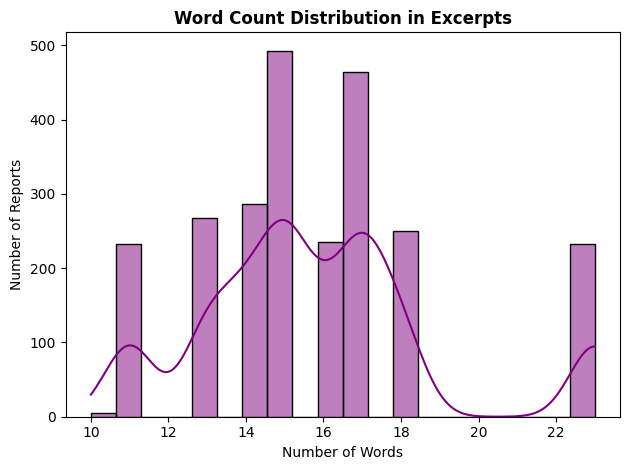

In [602]:
df['text_length'] = df['excerpt'].astype(str).apply(lambda x: len(x.split()))

sns.histplot(df['text_length'], bins=20, kde=True, color='purple')
plt.title('Word Count Distribution in Excerpts', weight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()



##  Feature Engineering

In this step, we convert the cleaned text and any selected structured features into a machine-readable format.

We will:
- Use **TF-IDF** to vectorize the `clean_excerpt` column.
- Select meaningful structured features for modeling.
- Combine both feature sets into a single matrix `X` for training.

In [603]:
df['severity'] = df['severity'].apply(lambda x: 'Unsafe' if x == 'Moderate' else x)
df['severity'].value_counts()

severity
Unsafe    1280
Safe      1188
Name: count, dtype: int64

In [604]:
# Binary encode the target column
df['severity'] = df['severity'].map({'Safe': 0, 'Unsafe': 1})

In [605]:
# List of selected features for structured modeling
selected_features = [
    'country', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
    'income_level', 'infrastructure_type', 'population_density', 'climate_zone', 'year',
    'severity_score', 'recent_rain', 'water_color', 'water_clarity', 'water_odor',
    'animal_access', 'waste_disposal_nearby', 'vegetation_near_source', 'water_flow_rate'
]

# Creating a new DataFrame with only selected features
df_structured = df[selected_features].copy()

# Preview the cleaned structured data
df_structured.head()

country      water_source    sanitation_type  \
0  Dem. Rep. Congo  Protected Spring  Composting Toilet   
1       Bangladesh  Protected Spring    Open Defecation   
2            Haiti             River       Flush Toilet   
3            India    Truck Delivery    Open Defecation   
4            India              Well  Composting Toilet   

                  sector  gender age_group income_level infrastructure_type  \
0  Public Infrastructure    Male     Adult         High          Urban Slum   
1              Education  Female     Youth         High       Rural Village   
2              Education  Female   Elderly       Middle       Rural Village   
3            Agriculture  Female     Child       Middle       Rural Village   
4              Education  Female   Elderly         High          Peri-Urban   

  population_density climate_zone  year  severity_score recent_rain  \
0              Dense    Temperate  2017               0          no   
1             Medium    Semi-Arid  2016               0          no   
2             Medium     Tropical  2024               2          no   
3             Medium         Arid  2015               2          no   
4              Dense         Arid  2016               0          no   

  water_color water_clarity water_odor animal_access waste_disposal_nearby  \
0       clear         clear       none            no                  none   
1       clear         clear       none            no                  none   
2       green         clear       none            no         managed sites   
3       murky        turbid       none           yes          open dumping   
4       clear         clear       none            no                  none   

  vegetation_near_source water_flow_rate  
0                   lush         flowing  
1                   lush         flowing  
2                   dead        stagnant  
3                 sparse        stagnant  
4                   lush         flowing

In [606]:
numerical_cols = df_structured.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_structured.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['year', 'severity_score']
Categorical Columns: ['country', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group', 'income_level', 'infrastructure_type', 'population_density', 'climate_zone', 'recent_rain', 'water_color', 'water_clarity', 'water_odor', 'animal_access', 'waste_disposal_nearby', 'vegetation_near_source', 'water_flow_rate']


In [607]:
# Checking for missing values in structured data
missing_values = df_structured.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

Series([], dtype: int64)

## Modeling

In this section, we build and evaluate machine learning models to predict unsafe water conditions based on a combination of structured and textual features.

### Objective
Train a classification model to detect whether a water source is unsafe using both:
- Structured features sanitation type, water clarity, severity score
- Textual descriptions excerpts

###  Steps:
1. **Train-Test Split**: We split the combined dataset into training and testing sets (80/20), ensuring balanced target classes using stratification.
2. **Model Selection**: Start with a simple baseline model (e.g., Logistic Regression) to set a performance benchmark.
3. **Evaluation**: Assess model performance using classification metrics such as accuracy, precision, recall, and F1-score.
4. **Tuning**: Tune hyperparameters and experiment with other models like, Random Forest, XGBoost for better performance.

The integrated features help us leverage both categorical/numerical context and textual insight to improve prediction accuracy.


### **Baseline:  Logistic Regression**

In [608]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd


In [609]:
text_col = 'clean_excerpt'
categorical_cols = ['country', 'water_source', 'sanitation_type', 'sector', 'gender',
                    'age_group', 'income_level', 'infrastructure_type',
                    'population_density', 'climate_zone', 'recent_rain', 'water_color',
                    'water_clarity', 'water_odor', 'animal_access', 
                    'waste_disposal_nearby', 'vegetation_near_source', 'water_flow_rate']

numerical_cols = ['year']

# Target
y = df['severity']

In [610]:
# Defining the transformers
preprocessor = ColumnTransformer([
    ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'clean_excerpt'),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])


In [611]:
# Combining text and structured pipelines
combined_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

In [612]:
# Training and preparing data

X = df[[text_col] + categorical_cols + numerical_cols]
y = df['severity']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# fitting the model
combined_pipeline.fit(X_train, y_train)

# Predict
y_pred = combined_pipeline.predict(X_test)
y_probs = combined_pipeline.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       238
           1       1.00      0.99      1.00       256

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



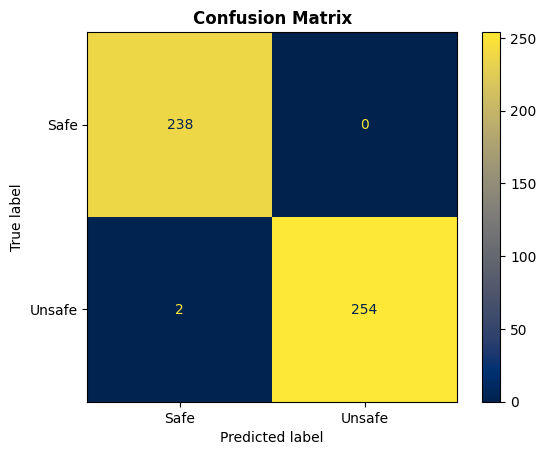

In [613]:
print("Classification Report:\n", classification_report(y_test, y_pred))

# Ploting our model performance
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "Unsafe"])
disp.plot(cmap='cividis')
plt.title('Confusion Matrix', weight='bold')
plt.grid(False)
plt.show()

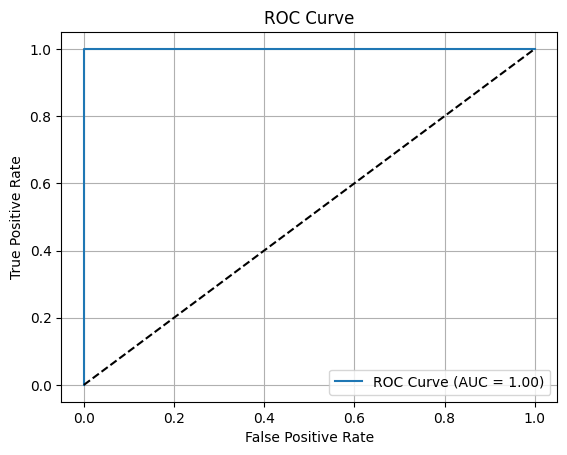

In [615]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [616]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Drop columns you don’t want to use as features (like ID or raw text)
df_model = df.drop(columns=['source_title', 'excerpt', 'clean_excerpt'])

# Encode all object (categorical) columns using LabelEncoder
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Define X and y
X = df_model.drop(columns='severity_score')
y = df_model['severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [617]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
[[297   0]
 [  0 320]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       320

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617



Confusion Matrix:
[[297   0]
 [  2 318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       297
           1       1.00      0.99      1.00       320

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617



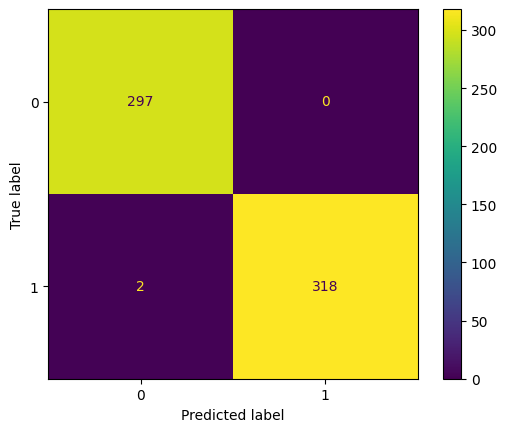

In [618]:
# Train with class_weight='balanced' to handle any remaining imbalance
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)

In [619]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                       param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_resampled, y_resampled)

# Best model and performance
print("Best Random Forest Params:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[[297   0]
 [  0 320]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       320

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617



In [622]:
# Sample input text
sample_text = "The water looks clear and does not have any odor."

# Step 1: Clean/preprocess the text (same as during training)
processed_text = clean_text(sample_text)

# Step 2: Transform using trained TF-IDF vectorizer
X_final = tfidf.transform([processed_text])

# Step 3: Predict with the trained model
prediction = model.predict(X_final)

# Step 4: Output result
label_map = {1: "safe", 2: "moderate",  3: "unsafe"} 
print(f"Predicted label: {label_map[prediction[0]]}")

print("Original:", sample_text)
print("Processed:", processed_text)
print("TF-IDF shape:", X_final.shape)
print("Non-zero TF-IDF entries:", X_final.nnz)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'